Il me reste à : 
- calculer les cij avec soit l'inversion de matrice, soit la minimsation du carré
- borner théoriquement la queue du noyau
- mettre les preuves en md 
- traduire en anglais ^^

- (optionnel) implémenter une meilleure méthode pour calculer les petits bouts d'intégrale (genre quadrature de gauss)

In [1]:
## Adding the .simplify_full() command may give cleaner functions to look at, but drastically increases the runtime (from 0.5 sec to more than 4 min), and, most importantly, causes completely unstable computations that ruin the precision (for unknown reasons).

prec = 300
R = RealBallField(prec)
var('x')
assume(x, 'real')
var('y')
assume(y, 'real')

W = (-x/2 + sqrt(1/27 + x^2/4))^(1/3) - (x/2 + sqrt(1/27 + x^2/4))^(1/3)
W_prime = diff(W, x)
a = 1 + W/x + W_prime
b = (3*x)/2 + W


n = 6 
a_derivs = [a]
b_derivs = [b]
for k in range(1, n+1):
    a_deriv_k = diff(a, x, k)
    b_deriv_k = diff(b, x, k)
    a_derivs.append(a_deriv_k)
    b_derivs.append(b_deriv_k)


phi_0 = -a_derivs[0] + b_derivs[1]/2 + a_derivs[2]/2 - a_derivs[4]/2 + a_derivs[6]/2
phi_1 = -a_derivs[0] - b_derivs[1]/2 + 2*a_derivs[2] + b_derivs[3]/2 - 3*a_derivs[4] - b_derivs[5]/2
phi_2 = -a_derivs[0] - (3/2)*b_derivs[1] + (9/2)*a_derivs[2] + (5/2)*b_derivs[3] # corresponds to the sign in the inequality
phi_3 = -a_derivs[0] - (5/2)*b_derivs[1]
phi_list = [phi_0, phi_1, phi_2, phi_3]


# Base Fourier function
f = (1 + 4*pi*abs(x) + 4*pi^2*x^2) * exp(-2*pi*abs(x)) / 8
lambda_0 = f
lambda_1 = diff(f, x)
lambda_2 = -diff(f, x, 2)
lambda_3 = diff(f, x, 3)
lambda_4 = diff(f, x, 4)
lambda_list = [lambda_0,lambda_1,lambda_2,lambda_3,lambda_4]


M_0 = lambda_list[0](x=x - y) * phi_list[0](x=y)
M_1 = lambda_list[1](x=x - y) * diff(phi_list[0], x)(x=y) + lambda_list[2](x=x - y) * phi_list[1](x=y)
M_2 = lambda_list[3](x=x - y) * diff(diff(phi_list[2], x),x)(x=y) +lambda_list[3](x=x - y) * diff(phi_list[2], x)(x=y)+ lambda_list[4](x=x - y) * phi_list[2](x=y)
M_list=[M_0,M_1,M_2]

In [2]:
# Convert symbolic functions to numerical ones evaluable on RealBallField elements
a_funcs = [fast_callable(expr, vars=[x], domain=R) for expr in a_derivs]
b_funcs = [fast_callable(expr, vars=[x], domain=R) for expr in b_derivs]
phi_funcs = [fast_callable(phi_expr, vars=[x], domain=R) for phi_expr in phi_list]
lambda_funcs = [fast_callable(lambda_expr, vars=[x], domain=R) for lambda_expr in lambda_list]
M=[fast_callable(expr, vars=[x,y], domain=R) for expr in M_list]

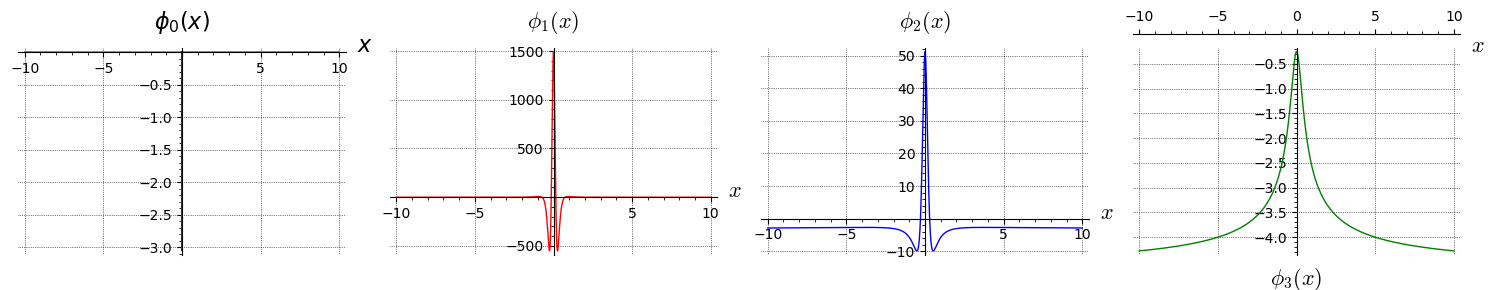

In [3]:
plots = []
colors = ['purple', 'red', 'blue', 'green']

for k in range(4):
    axes_label = [r'$x$', f'$\\phi_{{{k}}}(x)$']
    p = plot(phi_list[k], (x, -10, 10), color=colors[k], figsize=3,
             axes_labels=axes_label, gridlines=True)
    plots.append(p)

show(graphics_array([plots]), figsize=[15, 3])


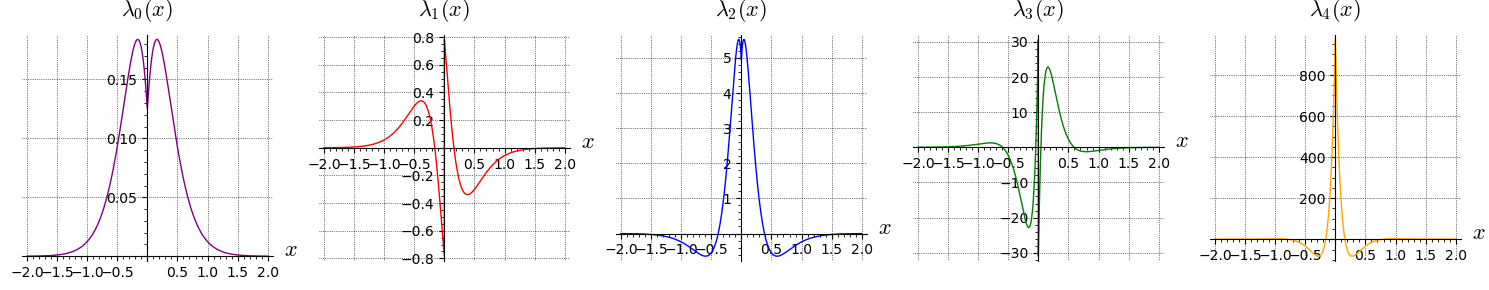

In [4]:
plots = []
colors = ['purple', 'red', 'blue', 'green', 'orange']

for k in range(5):
    axes_label = [r'$x$', f'$\\lambda_{{{k}}}(x)$']
    p = plot(lambda_list[k], (x, -2, 2), color=colors[k],figsize=3,
             axes_labels=axes_label, gridlines=True)
    plots.append(p)

show(graphics_array([plots]), figsize=[15, 3])

In [5]:
x0 = R(0.00001)

print("Evaluations of the derivatives of a at x =",float(x0),":")
for k in range(n+1):
    a_val = a_funcs[k](x0)
    print(f"d^{k}a/dx^{k}({x0.center():.2f}) = {a_val}")

print("\nEvaluations of the functions phi at x =",float(x0),":")
for k in range(4):
    val = phi_funcs[k](x0)
    print(f"phi_{k}({x0.center():.2f}) = {val}")

Evaluations of the derivatives of a at x = 1e-05 :
d^0a/dx^0(0.00) = [-0.999999999600000000179999934461556927728148457565528156356015115547536403456483866060 +/- 4.25e-85]
d^1a/dx^1(0.00) = [7.99999999280000066018442954090451418302603007506383991200216667789567957271e-5 +/- 6.01e-80]
d^2a/dx^2(0.00) = [7.99999997840000002879999643530808036704307882998627405573429556791576037841 +/- 8.99e-75]
d^3a/dx^3(0.00) = [-0.00431999998848000037186919005791452155419451467809983061790114200052 +/- 5.77e-69]
d^4a/dx^4(0.00) = [-431.99999654400000923999941806625439340692582122669464729386168296 +/- 1.13e-63]
d^5a/dx^5(0.00) = [0.691199996304000066448893939345786641078719523081731933809 +/- 9.67e-58]
d^6a/dx^6(0.00) = [69119.998891200004953311805293271527846051226448098266191 +/- 5.09e-52]

Evaluations of the functions phi at x = 1e-05 :
phi_0(0.00) = [34781.249443860952481290407353845589632989969550248978712 +/- 4.18e-52]
phi_1(0.00) = [1495.74998806725003194845299055294935096148660579098020858186527

In [24]:
def rigorous_max_partial_derivatives(f, x1, x2, y1, y2):
    var('x y')
    I_x = R(x1, x2)
    I_y = R(y1, y2)

    # dérivées partielles
    fx = diff(f, x)
    fy = diff(f, y)

    # Evaluation sur domaine 2D
    fx_eval = R(fx(x=I_x, y=I_y))
    fy_eval = R(fy(x=I_x, y=I_y))

    # Majoration de la valeur absolue
    fx_sup = R(max(abs(fx_eval.lower()), abs(fx_eval.upper())))
    fy_sup = R(max(abs(fy_eval.lower()), abs(fy_eval.upper())))

    return fx_sup, fy_sup

def riemann_integral(f_expr, x1, x2, y1, y2, n):
    
    var('x y')
    f_num = fast_callable(f_expr, vars=[x, y], domain=R)

    dx = (R(x2) - R(x1))/n
    dy = (R(y2) - R(y1))/n

    total = R(0)
    for i in range(n):
        for j in range(n):
            xi = R(x1) + i*dx
            yj = R(y1) + j*dy
            total += f_num(xi, yj) * dx * dy
        
        # Calcul du taux de complétion
        percent = int((i / n) * 100)
        sys.stdout.write(f"\rProgression : {percent}%")
        sys.stdout.flush()

    #max_fx, max_fy = rigorous_max_partial_derivatives(f_expr, x1, x2, y1, y2)

    # Calcul borne d'erreur théorique
    # largeur = R(x2) - R(x1)
    # hauteur = R(y2) - R(y1)
    # error_bound = (largeur * hauteur / n) * (largeur * max_fx + hauteur * max_fy)
    return total #,error_bound

# Exemple d'utilisation
var('x y')
f_expr = M_2
approx_integral  = riemann_integral(f_expr,-1,1,-1,1, n=100)

print(f"\rApproximation de l'intégrale : {approx_integral}")
# print(f"Borne d'erreur théorique (approx.) : {error_bound}")
# print("L'intégrale est contenue dans l'intervalle [",float((approx_integral-error_bound).lower()) ,",",float((approx_integral+error_bound).upper()),"]")

Approximation de l'intégrale : nan


In [27]:
import random

x_points = [R(2 * random.random() - 1) for _ in range(100)]
y_points = [R(2 * random.random() - 1) for _ in range(100)]
for xi in x_points:
    for yi in y_points :
        print(M[2](xi, yi))


[-6.3077592960420656338217720445489013758579350773047670682709378654799255669808173549185 +/- 4.83e-86]
[1217.30910849039383217205966052968166874172197619509262437207554890146794067197847989975 +/- 8.10e-84]
[-94.678510194291069394697037628272148194849716205965102285388151419436996177197262319465 +/- 4.58e-85]
[420.29529632585388186666106667073465599890849463942126096460446968979802642742242838883 +/- 9.76e-84]
[1104.45009307631844557096702695127723222455814383842064086472127668726601987068807217779 +/- 5.86e-84]
[-779.77008433411633092589545552502601668885822356930566965276577394806806319468348586663 +/- 2.11e-84]
[-5.7158391277636468131955497621426650852862322533972781877884744057974573609609120194683 +/- 3.09e-86]
[1341.71237717732481900523948819619882477284305286942849290407638867667478696897450517712 +/- 6.29e-84]
[-252.5469320031925306263910471464304638236031699294604289157177549005368219216404838133 +/- 1.26e-83]
[493.8238539409260161491557269035579209328006022863973497729281817